In [1]:
import pymongo


client = pymongo.MongoClient()

# print(client.list_database_names())
db = client['PAM2060']
# print(db.list_collection_names())
col = db['vision_retries']


In [12]:
for s in range(101,111):
    res = col.find({'station':s, 'component': 'holder'})
    res = [r['steps'] for r in res]
    res2 = [len(r) for r in res]
    av = sum(res2) / len(res2)

    print(s, av, res)

/tmp/ipykernel_11151/338245447.py:10: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  print(col.find({'component': 'dosing', "_id": {"$gte": dummy_id}}).count())


714
101 holder 2.5974025974025974
101 dosing 0.0
102 holder 1.3157894736842104
102 dosing 0.0
103 holder 2.666666666666667
103 dosing 2.666666666666667
104 holder 0.0
104 dosing 6.8493150684931505
105 holder 0.0
105 dosing 0.0
106 holder 0.0
106 dosing 0.0
107 holder 2.941176470588235
107 dosing 5.88235294117647
108 holder 1.4285714285714286
108 dosing 0.0
109 holder 2.941176470588235
109 dosing 4.411764705882353
110 holder 20.8955223880597
110 dosing 2.9850746268656714


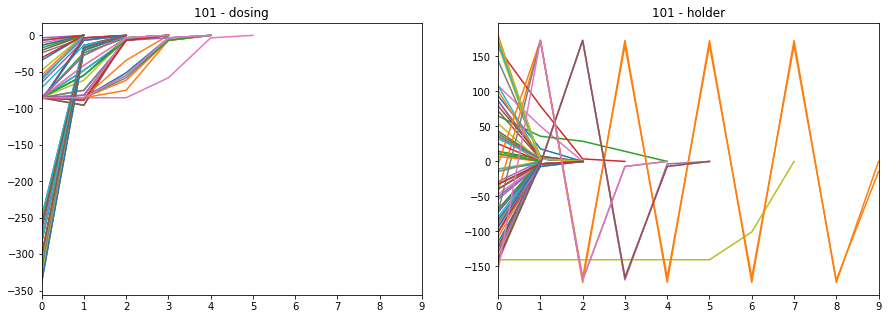

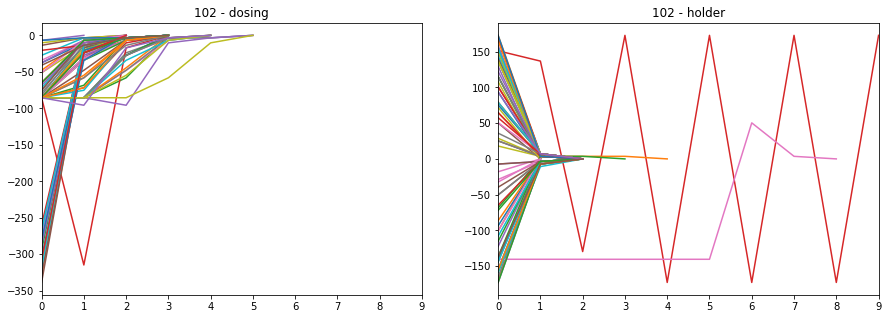

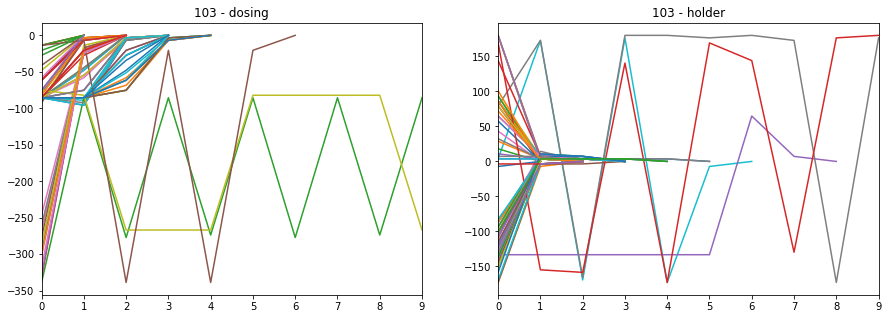

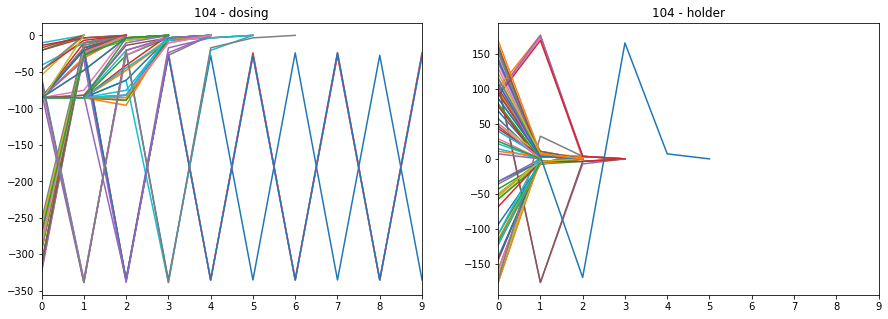

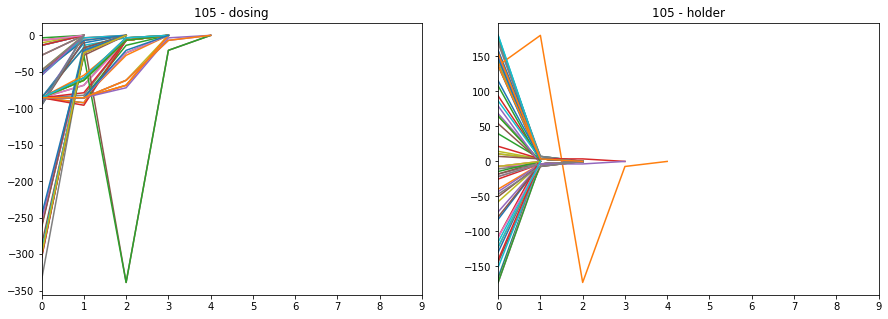

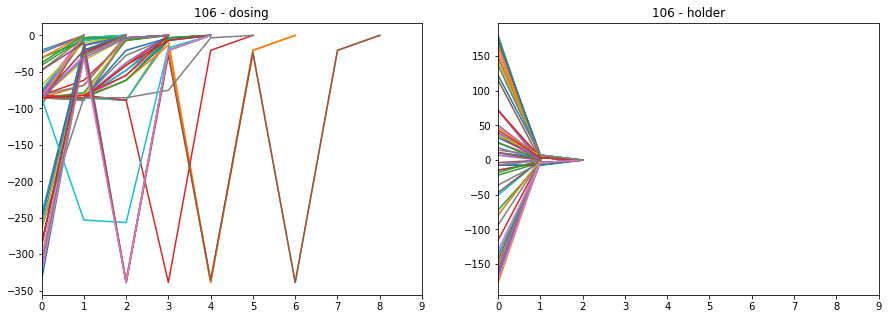

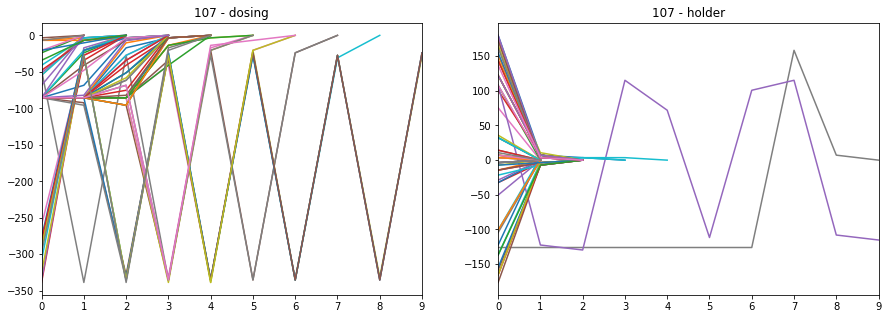

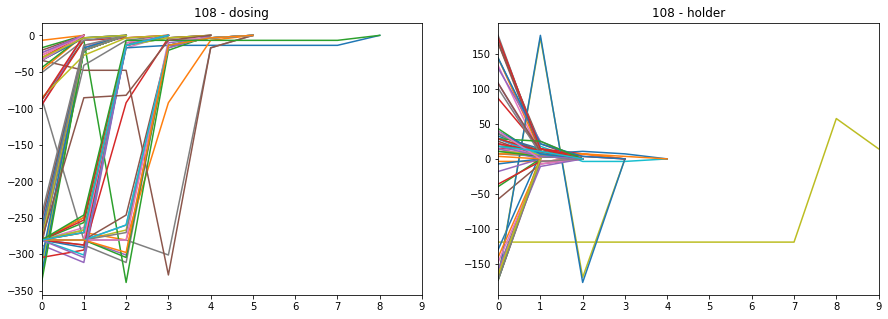

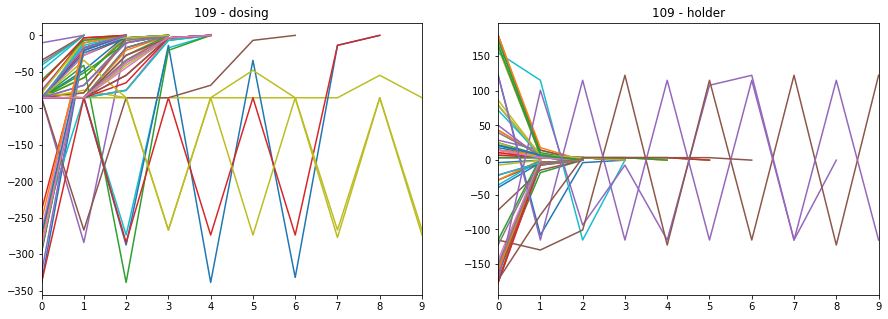

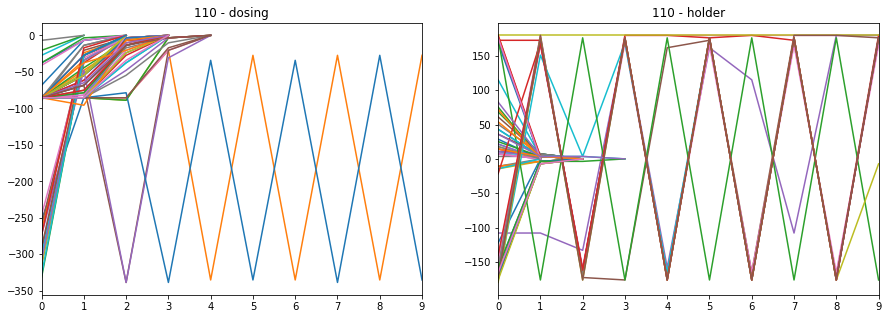

In [10]:
import matplotlib.pyplot as plt
import datetime
from bson.objectid import ObjectId

mins = 15
now = datetime.datetime.now() - datetime.timedelta(hours=3.5)
from_time = now - datetime.timedelta(hours=20)
dummy_id = ObjectId.from_datetime(from_time)

print(col.find({'component': 'dosing', "_id": {"$gte": dummy_id}}).count())
for s in range(101,111):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    axs = {'dosing': ax1, 'holder': ax2}
    fig.set_size_inches(15, 5, forward=True)

    for component in ['holder', 'dosing']:
        res = col.find({'station':s, 'component': component, "_id": {"$gte": dummy_id}})
        res = [r['steps'] for r in res]
        print(s, component, sum([len(r) == 10 for r in res])/len(res)*100)
        ax = axs[component]
        for i in res:
            ax.plot(i)
        ax.set_xlim(0,9) 

        ax.set_title(str(s) + ' - ' + component)
